In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes = "True")

In [3]:
#reading data
ds = pd.read_csv("C:\Users\Vignesh\Documents\\video_game.csv")

My ultimate aim in obtaining this dataset and performing the following set of analysis is to understand the popular console among general public over the past years.

First thing's first....Looking at the rows* column information

In [4]:
ds.shape

(16719, 16)

Checking for null values

In [5]:
ds.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

Looking at the data type of the ddifferent variables...

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Dropping all the rows that have missing values

In [7]:
ds = ds.dropna(axis=0)

In [8]:
#ds['User_Score'] = ds.User_Score.convert_objects(convert_numeric = True)
ds['User_Score'] = pd.to_numeric(ds['User_Score'])

In [27]:
#for future reference
#Best to use elif
#Codes for my reference...not used in analysis. Although I initially used it, the performance was just so poor for mu=y algorithm
for i in range(0,ds.shape[0]-1):
    if(ds['Platform'][i] in ['PS', 'PS2', 'PS3', 'PS4', 'PSP']):
        ds['Console'][i] = 'PlayStation'
    else:
        if(ds['Platform'][i] in ['X360', 'XB', 'XOne']):
            ds['Console'][i] = 'XBox'
        else: 
            if(ds['Platform'][i] in ['Wii', 'WiiU']):
                ds['Console'][i] = 'Nintendo'
            else:
                ds['Console'][i] = 'Other'

F:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

Lots of platforms were there in the dataset and hence I had to derive a new variable to just have three top contenders
which are PlayStation, XBox and Nintendo. 

For PlayStation, I have taken into consideration PS1, PS2, PS3, PS4 and PSP
For XBOX -> X360 (XBox 360), XB (Xbox), XOne (XBox One)
For Nintendo -> Wii and WiiU

In [9]:
def console(c):
    if(c['Platform'] in ['PS', 'PS2', 'PS3', 'PS4', 'PSP']):
        return 'PlayStation'
    elif (c['Platform'] in ['X360', 'XB', 'XOne']):
        return 'XBox'
    elif (c['Platform'] in ['Wii', 'WiiU']):
        return 'Nintendo'
    else:
        return 'Others'

In [10]:
ds['Console'] = ds.apply(console, axis=1) #For my future reference..axis = 1 to ensure its applied to rows

Forming a subset to have just the data from the last few years and also another subset taking out Other consoles from the dataset


In [11]:
#ds_subset = ds[(ds['Console'] == 'PlayStation') | (ds['Console'] == 'XBox') | (ds['Console'] == 'Nintendo') && (ds['Year_of_Release'] > 2004) && (ds['Year_of_Release'] != 2020)]
ds_subset = ds[(ds['Console'] != 'Others') & (ds['Year_of_Release'] > 2003)]
ds_subset_withoutyear = ds[(ds['Console'] != 'Others')]

Plotting the number of games bought in each console and PlayStation is leading the pact

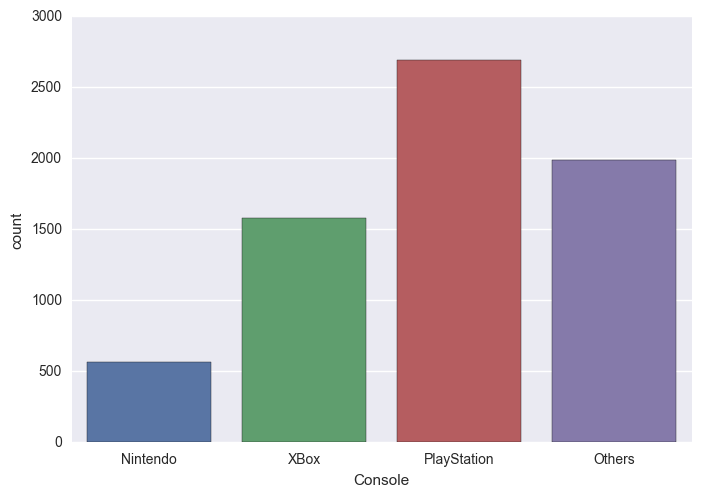

In [12]:
sns.countplot(data = ds, x = 'Console', order = ['Nintendo', 'XBox', 'PlayStation', 'Others'])#

Adding another dimension to the plot, which is the ESRB rating. 

A sort of analysis to understand the types of games played in each console. 

PlayStation has a lot of teen games that are played, so as in XBox, whereas in Nintendo, E rated games are played to a larger extent.

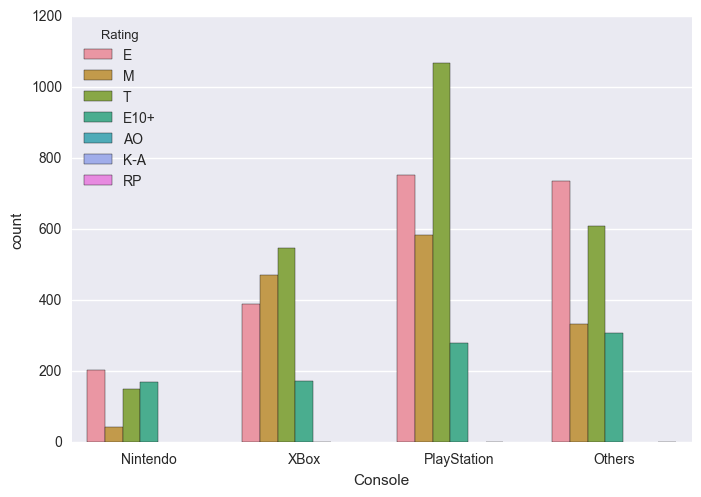

In [13]:
sns.countplot(data = ds, x = 'Console', hue = 'Rating', order = ['Nintendo', 'XBox', 'PlayStation', 'Others'])#

PlayStation again leads the race in the Global Sales

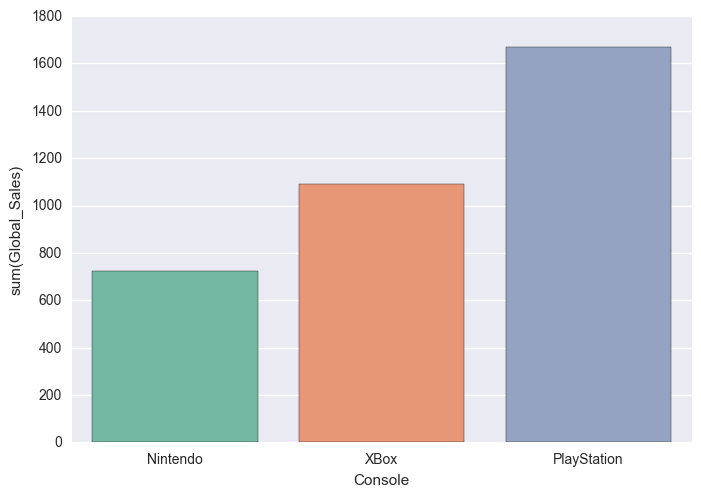

In [14]:
sns.barplot(data = ds_subset, x = 'Console', y = 'Global_Sales', estimator = sum, palette = "Set2", ci = 0)

Year-wise sales plot

F:\Anaconda2\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


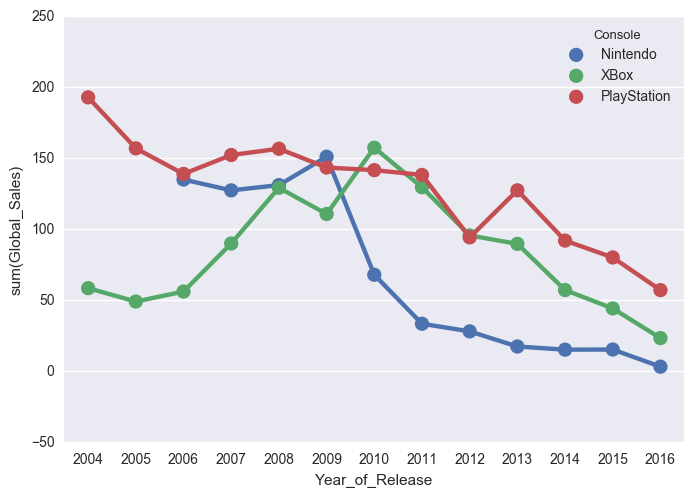

In [15]:
ds_subset.Year_of_Release = ds_subset.Year_of_Release.astype(int)
sns.pointplot(data = ds_subset, x = 'Year_of_Release', y = 'Global_Sales', ci = 0, estimator = sum, hue = 'Console', join = True)
plt.show()

Let's do an interesting sub analysis by understanding the sales across genres and understand which genre is the best selling one

In [16]:
ds_genre = ds_subset.groupby(['Genre']).Global_Sales.sum()

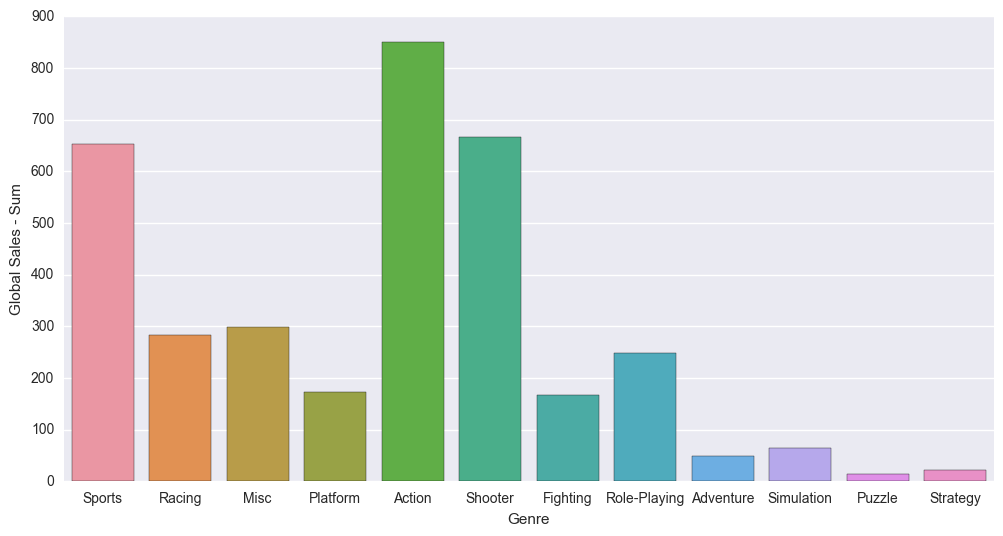

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(data = ds_subset, x = 'Genre', y = 'Global_Sales', estimator = sum, ci=0)
plt.ylabel('Global Sales - Sum')

### We can see that Action, Sports and Shooter are the top-selling genres

Now, lets understand how the trend is across consoles for the different genres

In [37]:
ds_subset_genre = ds_subset[(ds_subset['Genre'] == 'Action') | (ds_subset['Genre'] == 'Shooter') | (ds_subset['Genre'] == 'Sports') | (ds_subset['Genre'] == 'Racing') | (ds_subset['Genre'] == 'Role-Playing')]

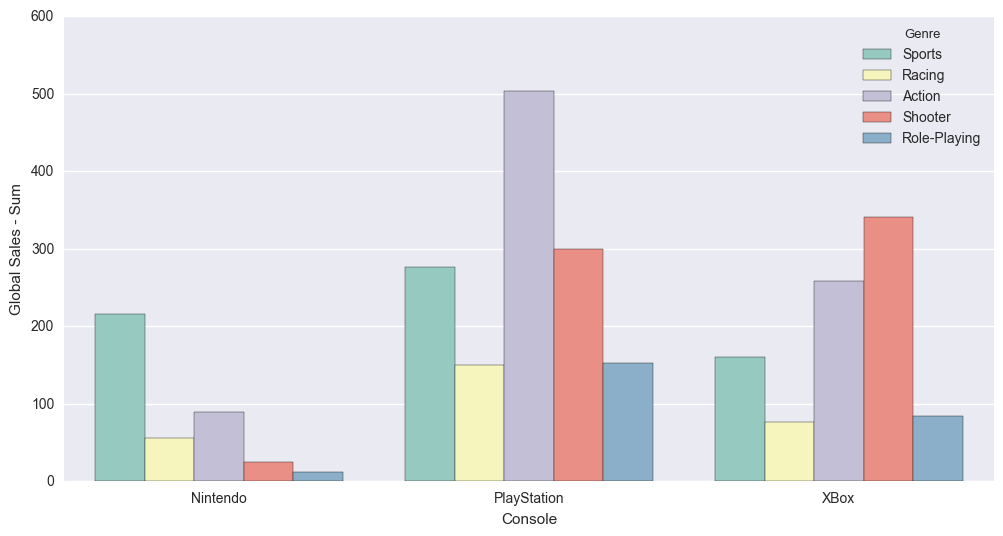

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(data = ds_subset_genre, x = 'Console', y = 'Global_Sales', hue = 'Genre', estimator = sum, ci=0, palette = 'Set3')
plt.ylabel('Global Sales - Sum')

In [123]:
ds_rating = ds_subset.groupby(['Rating']).Global_Sales.sum()

In [124]:
ds_rating

Rating
AO         1.95
E       1076.46
E10+     415.35
M       1163.52
T        829.84
Name: Global_Sales, dtype: float64

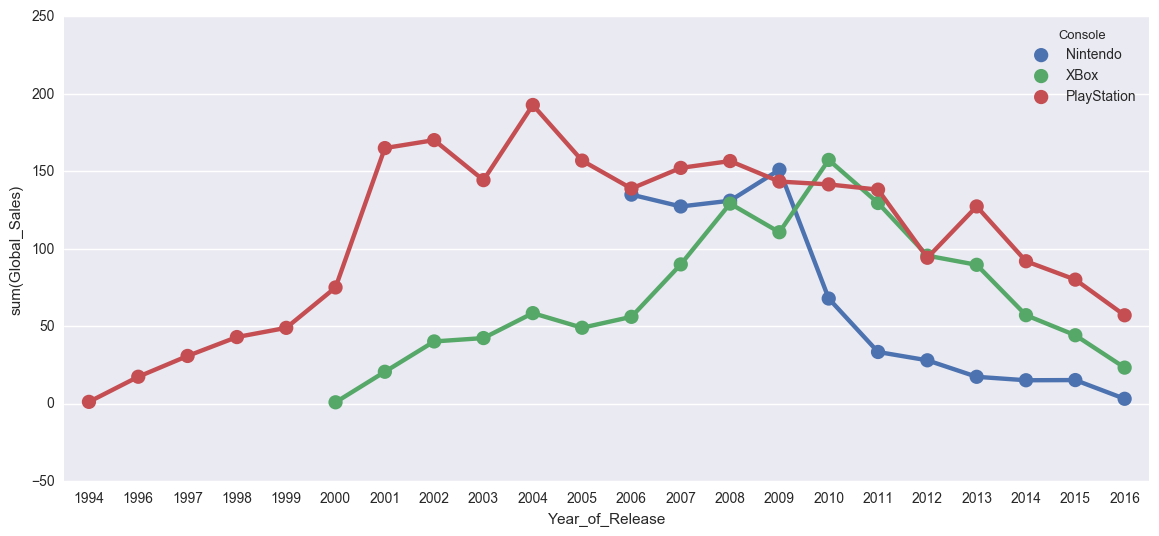

In [41]:
plt.figure(figsize=(14,6))
ds_subset_withoutyear.Year_of_Release = ds_subset_withoutyear.Year_of_Release.astype(int)
sns.pointplot(data = ds_subset_withoutyear, x = 'Year_of_Release', y = 'Global_Sales', ci = 0, estimator = sum, hue = 'Console', join = True)
plt.show()

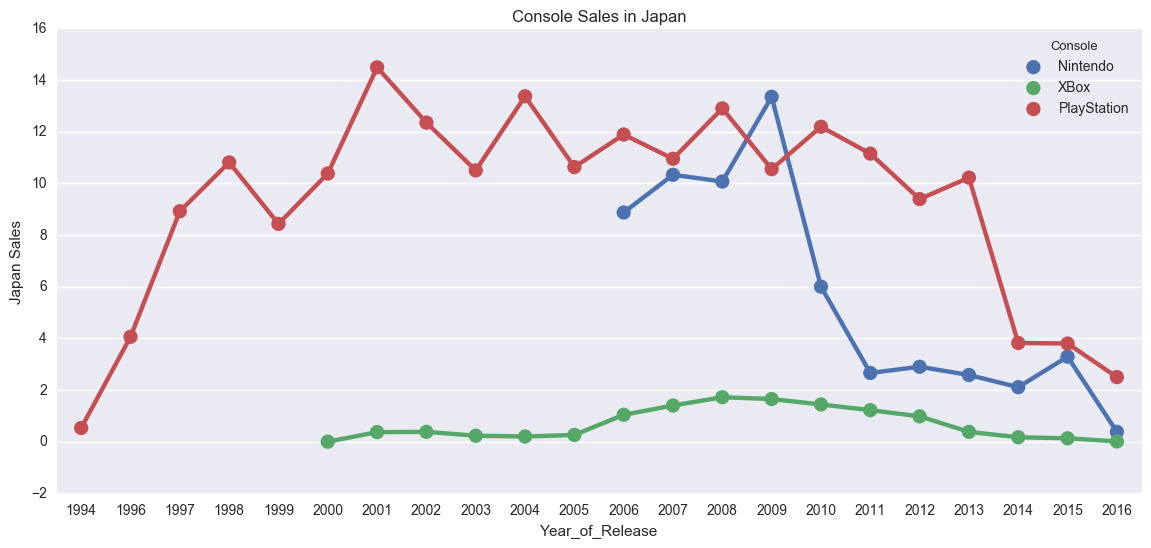

In [44]:
plt.figure(figsize=(14,6))
ds_subset.Year_of_Release = ds_subset.Year_of_Release.astype(int)
sns.pointplot(data = ds_subset_withoutyear, x = 'Year_of_Release', y = 'JP_Sales', ci = 0, estimator = sum, hue = 'Console', join = True)
plt.title('Console Sales in Japan')
plt.ylabel('Japan Sales')
plt.show()

From the above analysis, we can conclude that XBox does not have any sort of market share in Japan. Nintendo and PlayStation were competing against each other from 2006 to 2009 and then PS seems to have won the race in Japan as well in recent years.  

### From the overall analysis, we can conclude that Playstation is the global frontrunner when it comes to video game consoles